<a href="https://colab.research.google.com/github/Shravani2906/Smart-Energy-Meter-with-AI-based-Load-Forecasting-/blob/main/Smart_Meter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload Kaggle API Key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shravanikorde","key":"199a929e65aa6ffc9e7500b65a5441f6"}'}

In [ ]:
# Step 2: Install Kaggle API
#!pip install kaggle

In [ ]:
# Step 3: Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Step 4: Download the London Smart Meter dataset
!kaggle datasets download -d jeanmidev/smart-meters-in-london

Dataset URL: https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london
License(s): ODbL-1.0
100% 1.16G/1.17G [00:11<00:00, 64.0MB/s]
100% 1.17G/1.17G [00:11<00:00, 111MB/s] 


In [ ]:
# Step 5: Unzip the dataset
!unzip -o smart-meters-in-london.zip daily_dataset.csv

Archive:  smart-meters-in-london.zip
  inflating: daily_dataset.csv       


In [ ]:
# Step 6: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
# Step 7: Load the Daily Dataset
daily_data = pd.read_csv('daily_dataset.csv', nrows=200000)
daily_data = daily_data.sample(frac=0.5, random_state=42)

# Display the first few rows of the dataset
daily_data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
119737,MAC004931,2012-03-05,0.0615,0.080354,0.448,48,0.083133,3.857,0.022
72272,MAC001951,2013-05-03,0.1715,0.191292,0.805,48,0.124469,9.182,0.066
158154,MAC005467,2012-10-03,0.0935,0.116750,0.312,48,0.063084,5.604,0.030
65426,MAC000010,2013-08-30,0.4270,0.527396,1.835,48,0.366542,25.315,0.129
30074,MAC004706,2012-09-11,0.0865,0.132604,0.830,48,0.144011,6.365,0.025


In [ ]:
daily_data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

In [ ]:
# Step 8: Prepare Data for Training
daily_data['day'] = pd.to_datetime(daily_data['day'], format='%Y-%m-%d')  # Adjust format if necessary
daily_data.set_index('day', inplace=True)

In [ ]:
# Step 9: Feature Engineering
daily_data['Year'] = daily_data.index.year
daily_data['Month'] = daily_data.index.month
daily_data['DayOfWeek'] = daily_data.index.dayofweek

In [ ]:
daily_data['energy_mean'] = daily_data['energy_mean'].fillna(daily_data['energy_mean'].mean())

In [ ]:
# Step 10: Prepare Data for Training
X = daily_data[['Year', 'Month', 'DayOfWeek']]
y = daily_data['energy_mean']  # Using energy_mean as the target variable

In [ ]:
# Step 11: Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# Step 12: Build the Deep Learning Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)   # regression output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(daily_data.isnull().sum())
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))

LCLid              0
energy_median      1
energy_mean        0
energy_max         1
energy_count       0
energy_std       290
energy_sum         1
energy_min         1
Year               0
Month              0
DayOfWeek          0
dtype: int64
False False


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Step 13: Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# history = model.fit(
#     X_train, y_train,
#     epochs=5, batch_size=16,
#     validation_split=0.2,
#     callbacks=[early_stop]
# )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 11.7753 - mae: 1.2299 - val_loss: 0.6082 - val_mae: 0.7640
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.3348 - mae: 0.9148 - val_loss: 2.0144 - val_mae: 1.4106
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.2061 - mae: 0.8819 - val_loss: 0.4386 - val_mae: 0.6435
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.9560 - mae: 0.7621 - val_loss: 4.8199 - val_mae: 2.1897
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8541 - mae: 0.7074 - val_loss: 0.0341 - val_mae: 0.1553
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.9792 - mae: 0.6877 - val_loss: 0.0349 - val_mae: 0.1579
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2011 - mae: 0.3046 - val_loss: 1.7716 - val_mae: 1.3218
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6380 - mae: 0.6207 - val_loss: 1.2172 - val_mae: 1.0921
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━

In [ ]:
# Step 14: Make Predictions
y_pred = model.predict(X_test).flatten()

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Step 15: Evaluate the Model
mse = np.mean(np.square(y_test, y_pred))
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0638


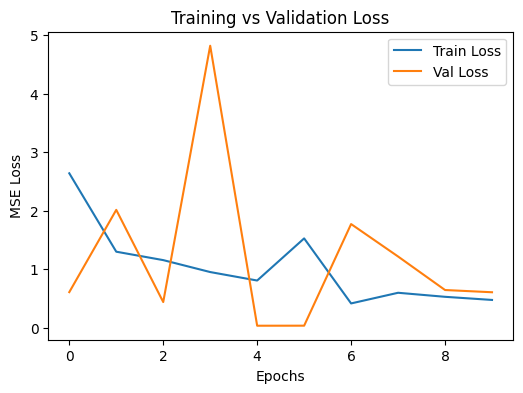

In [ ]:
# Step 16: Plotting the Results
#(A) Loss curve
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

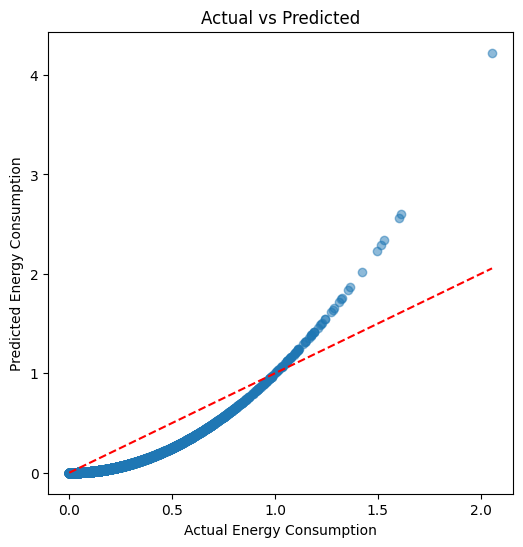

In [ ]:
# (B) Scatter plot (ideal line y=x)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted")
plt.show()

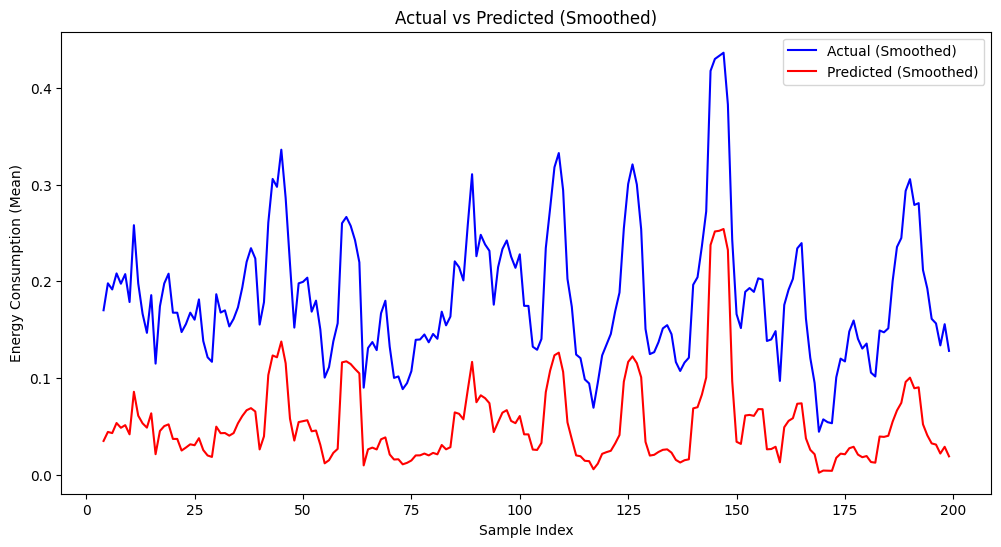

In [ ]:
# (C) Line plot (first 200 points)
y_test_smooth = pd.Series(y_test.values[:200]).rolling(window=5).mean()
y_pred_smooth = pd.Series(y_pred[:200]).rolling(window=5).mean()

plt.figure(figsize=(12,6))
plt.plot(y_test_smooth, label="Actual (Smoothed)", color="blue")
plt.plot(y_pred_smooth, label="Predicted (Smoothed)", color="red")
plt.xlabel("Sample Index")
plt.ylabel("Energy Consumption (Mean)")
plt.title("Actual vs Predicted (Smoothed)")
plt.legend()
plt.show()

In [ ]:
# Step 17: Save Model for Deployment
model.save('final_model.keras')
print("Model saved successfully!")

Model saved successfully!
